# Postgre SQL

## Conectando o Python no PostgreSQL usando psycopg2

- Compreender como executar consultas SQL e manipular dados retornados
- Dominar o processo de fechamento de cursor e conexão para otimização de recursos


- pypi - [link](https://pypi.org/project/psycopg2/)
- [Documentação](https://www.psycopg.org/docs/)
- [Página "Home"](https://www.psycopg.org/)

In [3]:
!pip install psycopg2

In [4]:
# Importando bibliotecas de interesse

import psycopg2 as pg2
import pandas as pd

##### Conectando ao banco de dados "demo" já criado no pgadmin

In [6]:
conn = pg2.connect(host='localhost', port=5432, dbname='demo', user='postgres', password='senha123')

**Criando um cursor. É como um canal de comunicação entre o python e o banco de dados**

In [8]:
cur = conn.cursor()

In [9]:
# Executando uma query

cur.execute('select * from ticket_flights')

In [10]:
conn.commit() # Para certificar da mudança/aplicação no banco de dados

In [11]:
# "Buscando" os dados

# data = cur.fetchone()
data = cur.fetchall()

In [12]:
# Fechando o cursor e a conexão

cur.close()
conn.close()

# se ficarem abertos consumiram recursos (memória)

In [13]:
# exibindo os dados [lista com tuplas]
data[:5]

[('0005432081075', 11002, 'Business', Decimal('99800.00')),
 ('0005433845814', 11047, 'Business', Decimal('99800.00')),
 ('0005432003470', 27484, 'Business', Decimal('99800.00')),
 ('0005433568595', 23503, 'Business', Decimal('105900.00')),
 ('0005432003656', 27415, 'Business', Decimal('99800.00'))]

In [14]:
# Gerando um dataframe

df = pd.DataFrame(data)

In [15]:
print(df.shape)
df.head()

(2360335, 4)


,0,1,2,3
0,0005432081075,11002,Business,99800.00
1,0005433845814,11047,Business,99800.00
2,0005432003470,27484,Business,99800.00
3,0005433568595,23503,Business,105900.00
4,0005432003656,27415,Business,99800.00


In [16]:
col_names = ['ticket_no', 'flight_id', 'fare_conditions', 'amout']

In [17]:
# Renomeando

# df = pd.DataFrame(data, columns=col_names)

df.columns = col_names
df.head()

,ticket_no,flight_id,fare_conditions,amout
0,0005432081075,11002,Business,99800.00
1,0005433845814,11047,Business,99800.00
2,0005432003470,27484,Business,99800.00
3,0005433568595,23503,Business,105900.00
4,0005432003656,27415,Business,99800.00


## Acessando a tabela dvdrental

In [19]:
# Realizando a conexão
conn = pg2.connect(host='localhost', port=5432, dbname='dvdrental', user='postgres', password='senha123')
# Criando o cursor
cur = conn.cursor()
# Eviando uma query
cur.execute('select * from actor')
# realizando o commit
conn.commit()
# Obtendo os dados
data = cur.fetchall()
colnames = [desc.name for desc in cur.description]

# Fechando
cur.close()
conn.close()

In [20]:
# Onde obtivemos os nomes das colunas
cur.description

(Column(name='actor_id', type_code=23),
 Column(name='first_name', type_code=1043),
 Column(name='last_name', type_code=1043),
 Column(name='last_update', type_code=1114))

In [21]:
# Gerando o dataframe
df_dvdrental = pd.DataFrame(data, columns = colnames)
df_dvdrental

,actor_id,first_name,last_name,last_update
0,1,Penelope,Guiness,2013-05-26 14:47:57.620
1,2,Nick,Wahlberg,2013-05-26 14:47:57.620
2,3,Ed,Chase,2013-05-26 14:47:57.620
3,4,Jennifer,Davis,2013-05-26 14:47:57.620
4,5,Johnny,Lollobrigida,2013-05-26 14:47:57.620
...,...,...,...,...
195,196,Bela,Walken,2013-05-26 14:47:57.620
196,197,Reese,West,2013-05-26 14:47:57.620
197,198,Mary,Keitel,2013-05-26 14:47:57.620
198,199,Julia,Fawcett,2013-05-26 14:47:57.620


In [22]:
df_dvdrental.dtypes

actor_id                int64
first_name             object
last_name              object
last_update    datetime64[ns]
dtype: object

In [23]:
df_dvdrental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   actor_id     200 non-null    int64         
 1   first_name   200 non-null    object        
 2   last_name    200 non-null    object        
 3   last_update  200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.4+ KB


## Junção de tabelas e agregação

- SQL envolvendo a junção de tabelas
- Cálculo da média por nome de categoria no SQL
- Ordenação de resultados e obtenção de médias em diferentes categorias

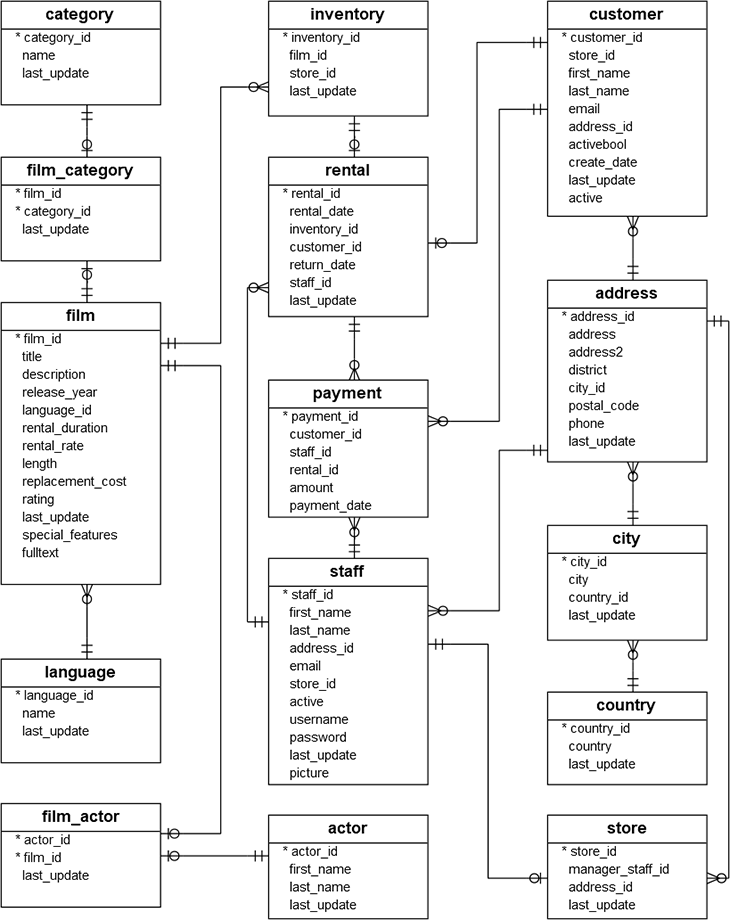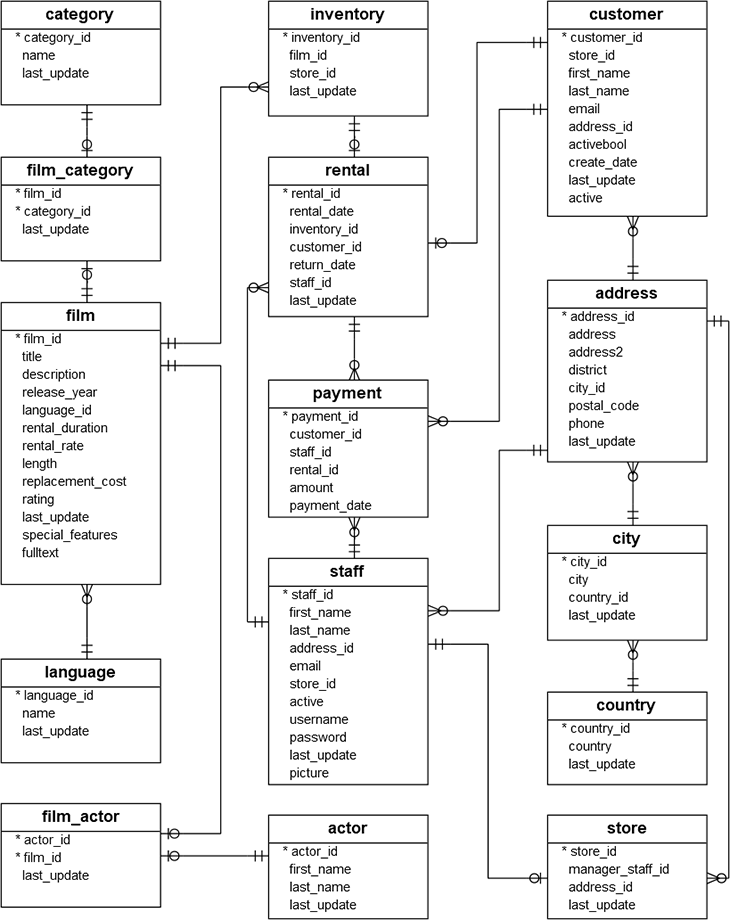

##### Calcule a média das seguintes variáveis por nome da categoria (dvdrental):

- rental_duration
- rental_rate
- length
- replacement_cost

In [27]:
# Estabelecendo a conexão
conn = pg2.connect(host='localhost', port=5432, dbname='dvdrental', user='postgres', password='senha123')
# criando cursor
cur = conn.cursor()
# Realizando a query
cur.execute(
    '''
    select *
    from film as x
        left join film_category as y
            on x.film_id = y.film_id
        left join category as z
            on y.category_id = z.category_id;
    '''
)

conn.commit()
data = cur.fetchall()
colnames = [desc.name for desc in cur.description]
#Fechando cursor e conexão
cur.close()
conn.close()

In [28]:
df = pd.DataFrame(data, columns=colnames)
print('Dimensão do DataFrame -->', df.shape)
df.head()

Dimensão do DataFrame --> (1000, 19)


,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext,film_id,category_id,last_update,category_id,name,last_update
0,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58.951,"[Deleted Scenes, Behind the Scenes]",'academi':1 'battl':15 'canadian':20 'dinosaur...,1,6,2006-02-15 10:07:09,6,Documentary,2006-02-15 09:46:27
1,2,Ace Goldfinger,A Astounding Epistle of a Database Administrat...,2006,1,3,4.99,48,12.99,G,2013-05-26 14:50:58.951,"[Trailers, Deleted Scenes]",'ace':1 'administr':9 'ancient':19 'astound':4...,2,11,2006-02-15 10:07:09,11,Horror,2006-02-15 09:46:27
2,3,Adaptation Holes,A Astounding Reflection of a Lumberjack And a ...,2006,1,7,2.99,50,18.99,NC-17,2013-05-26 14:50:58.951,"[Trailers, Deleted Scenes]",'adapt':1 'astound':4 'baloon':19 'car':11 'fa...,3,6,2006-02-15 10:07:09,6,Documentary,2006-02-15 09:46:27
3,4,Affair Prejudice,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,5,2.99,117,26.99,G,2013-05-26 14:50:58.951,"[Commentaries, Behind the Scenes]",'affair':1 'chase':14 'documentari':5 'fanci':...,4,11,2006-02-15 10:07:09,11,Horror,2006-02-15 09:46:27
4,5,African Egg,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,6,2.99,130,22.99,G,2013-05-26 14:50:58.951,[Deleted Scenes],'african':1 'chef':11 'dentist':14 'documentar...,5,8,2006-02-15 10:07:09,8,Family,2006-02-15 09:46:27


In [29]:
# Avaliando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   film_id           1000 non-null   int64         
 1   title             1000 non-null   object        
 2   description       1000 non-null   object        
 3   release_year      1000 non-null   int64         
 4   language_id       1000 non-null   int64         
 5   rental_duration   1000 non-null   int64         
 6   rental_rate       1000 non-null   object        
 7   length            1000 non-null   int64         
 8   replacement_cost  1000 non-null   object        
 9   rating            1000 non-null   object        
 10  last_update       1000 non-null   datetime64[ns]
 11  special_features  1000 non-null   object        
 12  fulltext          1000 non-null   object        
 13  film_id           1000 non-null   int64         
 14  category_id       1000 no

##### Calculando a média (groupby)

In [31]:
df[['name', 'rental_duration', 'rental_rate', 'length', 'replacement_cost']].groupby('name').mean()

,rental_duration,rental_rate,length,replacement_cost
name,,,,
Action,4.953125,2.64625,111.609375,20.911875
Animation,4.893939,2.808182,111.015152,20.126364
Children,5.033333,2.89,109.800000,20.056667
Classics,5.070175,2.744386,111.666667,21.007544
Comedy,4.931034,3.162414,115.827586,19.024483
Documentary,4.764706,2.666471,108.750000,19.622353
Drama,5.080645,3.022258,120.838710,21.086774
Family,5.173913,2.758116,114.782609,19.72913
Foreign,5.109589,3.099589,121.698630,18.647534


In [32]:
df[['name', 'rental_duration', 'rental_rate', 'length', 'replacement_cost']].dtypes

name                object
rental_duration      int64
rental_rate         object
length               int64
replacement_cost    object
dtype: object

O groupby converteu o "pandas object" para "float", mas caso fosse necessário realizarmos a conversão, faríamos:

In [34]:
# Convertendo para float

df.rental_rate = df['rental_rate'].astype(float)
df.replacement_cost = df['replacement_cost'].astype(float)

In [35]:
df[['name', 'rental_duration', 'rental_rate', 'length', 'replacement_cost']].dtypes

name                 object
rental_duration       int64
rental_rate         float64
length                int64
replacement_cost    float64
dtype: object

In [36]:
# Calculando a média novamente e ordenando pelo "rental_duration"
df[['name', 'rental_duration', 'rental_rate', 'length', 
    'replacement_cost']].groupby('name').mean().sort_values('rental_duration')

,rental_duration,rental_rate,length,replacement_cost
name,,,,
Sports,4.716216,3.125135,128.202703,20.395405
New,4.746032,3.116984,111.126984,19.418571
Documentary,4.764706,2.666471,108.750000,19.622353
Horror,4.857143,3.025714,112.482143,19.865000
Sci-Fi,4.885246,3.219508,108.196721,21.153934
Animation,4.893939,2.808182,111.015152,20.126364
Comedy,4.931034,3.162414,115.827586,19.024483
Action,4.953125,2.646250,111.609375,20.911875
Children,5.033333,2.890000,109.800000,20.056667


##### Realizando a query já com a sub-query e as médias, bem como com o "order by --rental_duration--"

In [38]:
conn = pg2.connect(host='localhost', port=5432, dbname='dvdrental', user='postgres', password='senha123')
cur = conn.cursor()
cur.execute(
    '''
select name, 
	avg(rental_duration) as avg_rental_duration, 
	avg(rental_rate) as avg_rental_rate, 
	avg(length) as avg_length, 
	avg(replacement_cost) as avg_replacement_cost

from (select *
	from film as x
		left join film_category as y
			on x.film_id = y.film_id
		left join category as z
			on y.category_id = z.category_id)

group by name

order by avg_rental_duration;
    ''')
conn.commit()
data2 = cur.fetchall()
colnames = [desc.name for desc in cur.description]

cur.close()
conn.close()

In [39]:
df2 = pd.DataFrame(data2, columns=colnames)
df2.set_index(df2.name, inplace=True)
df2

,name,avg_rental_duration,avg_rental_rate,avg_length,avg_replacement_cost
name,,,,,
Sports,Sports,4.7162162162162162,3.1251351351351351,128.2027027027027027,20.3954054054054054
New,New,4.7460317460317460,3.1169841269841270,111.1269841269841270,19.4185714285714286
Documentary,Documentary,4.7647058823529412,2.6664705882352941,108.7500000000000000,19.6223529411764706
Horror,Horror,4.8571428571428571,3.0257142857142857,112.4821428571428571,19.8650000000000000
Sci-Fi,Sci-Fi,4.8852459016393443,3.2195081967213115,108.1967213114754098,21.1539344262295082
Animation,Animation,4.8939393939393939,2.8081818181818182,111.0151515151515152,20.1263636363636364
Comedy,Comedy,4.9310344827586207,3.1624137931034483,115.8275862068965517,19.0244827586206897
Action,Action,4.9531250000000000,2.6462500000000000,111.6093750000000000,20.9118750000000000
Children,Children,5.0333333333333333,2.8900000000000000,109.8000000000000000,20.0566666666666667


## Transformando em funções

- Compreender a necessidade de criar funções para tarefas recorrentes em Python
- Desenvolver funções para contexto de interação com bancos de dados
- Aplicar funções criadas para realizar consultas e retornar resultados

In [41]:
import psycopg2 as pg2
import pandas as pd

In [42]:
# Criando uma função para fazer a conexão

def connect_to_postgre(dbname):
    conn = None
    try:
        conn = pg2.connect(host='localhost', 
                           port=5432, 
                           dbname=dbname,
                           user='postgres', 
                           password='senha123')
    except exception as e:
        print(e)
        conn = None
    return conn


# Criando uma função para envio da query

def get_result_query(conn, query, fetch='all'):
    data = None
    colnames = None
    
    try:
        cur = conn.cursor()
        cur.execute(query)
        conn.commit()

        if fetch == 'all':
            data = cur.fetchall()
        elif fetch == 'many':
            data = cur.fetchmany()
        elif fetch == 'one':
            data = cur.fetchone()
        else:
            data = None
            return data, colnames
            
        colnames = [desc.name for desc in cur.description]
    
        cur.close()
        conn.close()
    except exception as e:
        print(e)
        cur.close()
        conn.close()

    return data, colnames


# Função para transformar em dataframe

def to_df(data, colnames):
    return pd.DataFrame(data, columns=colnames)

In [43]:
# Aplicando as funções

dbname = 'dvdrental'
query = '''
        select *
        from film as x
            left join film_category as y
                on x.film_id = y.film_id
            left join category as z
                on y.category_id = z.category_id;
        '''

# Conexão
conn = connect_to_postgre(dbname)
# Execução da query e obtenção dos dados
data, colnames = get_result_query(conn, query, fetch='all')
# Gerando o dataframe
df = to_df(data, colnames)

In [44]:
print(df.shape)
df.head(2)

(1000, 19)


,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext,film_id,category_id,last_update,category_id,name,last_update
0,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58.951,"[Deleted Scenes, Behind the Scenes]",'academi':1 'battl':15 'canadian':20 'dinosaur...,1,6,2006-02-15 10:07:09,6,Documentary,2006-02-15 09:46:27
1,2,Ace Goldfinger,A Astounding Epistle of a Database Administrat...,2006,1,3,4.99,48,12.99,G,2013-05-26 14:50:58.951,"[Trailers, Deleted Scenes]",'ace':1 'administr':9 'ancient':19 'astound':4...,2,11,2006-02-15 10:07:09,11,Horror,2006-02-15 09:46:27
